# We are going to classify images

In [ ]:
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
#Download training dataset
dataset = MNIST(root='data/', download = True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 37.6MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 1.07MB/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 7.95MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 2.33MB/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
type(dataset)

torchvision.datasets.mnist.MNIST

In [ ]:
len(dataset)

60000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 5


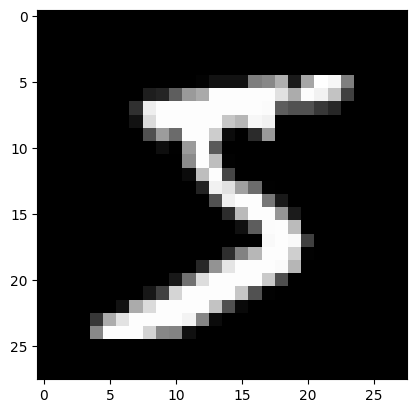

In [ ]:
image, label = dataset[0]

plt.imshow(image, cmap = 'grey')

print('Label:', label)

Label: 3


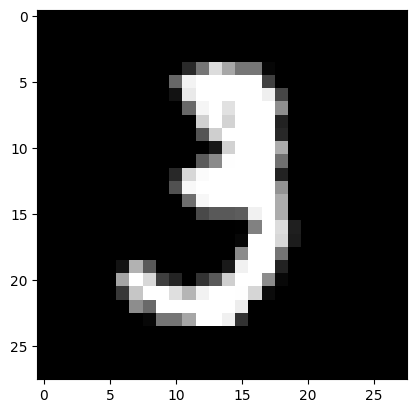

In [ ]:
image, label = dataset[10]

plt.imshow(image, cmap = 'grey')

print('Label:', label)

In [ ]:
import torchvision.transforms as transforms

We will be converting these images into tensors

In [ ]:
# Taking train data from dataset

dataset = MNIST(root = 'data/', train = True, transform = transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[0]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 5


In [ ]:
print(img_tensor[:,10:15,10:15])
print(torch.max(img_tensor),torch.min(img_tensor))

tensor([[[0.0039, 0.6039, 0.9922, 0.3529, 0.0000],
         [0.0000, 0.5451, 0.9922, 0.7451, 0.0078],
         [0.0000, 0.0431, 0.7451, 0.9922, 0.2745],
         [0.0000, 0.0000, 0.1373, 0.9451, 0.8824],
         [0.0000, 0.0000, 0.0000, 0.3176, 0.9412]]])
tensor(1.) tensor(0.)


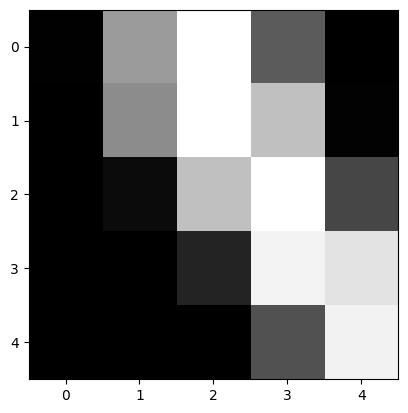

In [ ]:
#plot the image by passing in the 28x28 matrix

plt.imshow(img_tensor[0,10:15,10:15], cmap = 'grey');

# We will be divinding the data into test, train and validation.

MNIST dataset has 6000 train images and 10000 test images by default.
We will be selecting some images for validation from train images.

We can do this by random_split method from pytorch

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])

len(train_ds), len(val_ds)

(50000, 10000)

Now we will load the images in dataloader as the number of images is very large

In [ ]:
from torch.utils.data import DataLoader

In [ ]:
batch_size = 128

train_loader = DataLoader(train_ds, batch_size, shuffle = True)
val_loader = DataLoader(val_ds, batch_size)

# Model


Now we will define our model

our model is **Logistic Regression** it has the same formula pred = x @ w.t() + b

Just like linear regression we can use nn.linear to create the model intead of defining weights manually

We have training data in images (1 x 28 x 28 ) which needs to be flattened out into a vector size of 784 (28*28) before being passed into model.

the output can be from 0 till 9. The predicted label for an image is simply the one with the highest probability.

In [ ]:
import torch.nn as nn

In [ ]:
input_size = 28*28
num_classes = 10

#Logistic regression model

model = nn.Linear(input_size, num_classes)

This model is larger so we will have to look at the weights

In [ ]:
print(model.weight.shape)

torch.Size([10, 784])


In [ ]:
print(model.bias.shape)

torch.Size([10])


Lets try to generate our output for our first batch

In [ ]:
for images, labels in train_loader:
  print(labels)
  print(images.shape)
  output = model(images)
  break

tensor([3, 6, 7, 5, 9, 8, 8, 8, 6, 2, 4, 2, 0, 4, 4, 5, 0, 1, 8, 4, 0, 1, 7, 2,
        2, 7, 3, 1, 5, 8, 0, 2, 9, 6, 2, 1, 0, 1, 4, 7, 6, 1, 0, 8, 8, 4, 0, 7,
        4, 9, 1, 2, 4, 0, 8, 6, 2, 5, 1, 3, 5, 6, 2, 1, 8, 0, 5, 2, 8, 7, 9, 8,
        0, 1, 8, 6, 8, 3, 7, 8, 3, 1, 3, 9, 3, 2, 0, 8, 8, 9, 4, 8, 7, 4, 4, 6,
        5, 8, 4, 6, 9, 8, 0, 0, 3, 8, 1, 5, 4, 8, 6, 6, 4, 3, 4, 8, 1, 6, 3, 6,
        6, 8, 3, 6, 2, 9, 2, 1])
torch.Size([128, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3584x28 and 784x10)

As the shapes are not equal so we can not multiply them.

We will have to flatten the images.

So there will be additional functionality involve and we can not use nn.linear anymore we will have to use nn.module now


In [ ]:
class MnistModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.linear = nn.Linear(input_size, num_classes)

  def forward(self,xb):
      xb = xb.reshape(-1, 784)
      out = self.linear(xb)
      return out

model = MnistModel()

In [ ]:
print(model.linear.weight.shape, model.linear.bias.shape)
list(model.parameters())

torch.Size([10, 784]) torch.Size([10])


[Parameter containing:
 tensor([[-0.0257,  0.0180,  0.0111,  ..., -0.0317,  0.0119, -0.0239],
         [-0.0264, -0.0214, -0.0120,  ..., -0.0108,  0.0030,  0.0076],
         [ 0.0148,  0.0109,  0.0033,  ..., -0.0244,  0.0100,  0.0067],
         ...,
         [-0.0335, -0.0261, -0.0111,  ..., -0.0287,  0.0221, -0.0304],
         [-0.0185, -0.0352,  0.0146,  ...,  0.0296, -0.0096,  0.0286],
         [-0.0062, -0.0064, -0.0325,  ...,  0.0079, -0.0174, -0.0252]],
        requires_grad=True),
 Parameter containing:
 tensor([ 0.0243,  0.0123,  0.0288,  0.0020, -0.0115,  0.0246, -0.0055, -0.0141,
          0.0156,  0.0209], requires_grad=True)]

Now after changing the shape lets try to use the custom model again

In [ ]:
for images, labels in train_loader:
    output = model(images)
    break


print("Output shape:" ,output.shape)
print('Sample output:', output.shape[:2])

Output shape: torch.Size([128, 10])
Sample output: torch.Size([128, 10])


To convert output rows in probabiility. We can use softmax function.

In [ ]:
import torch.nn.functional as F

In [ ]:
#Applying softmax function for each output row

probs = F.softmax(output, dim = 1)

#Look at sample porbability

print('sample porbabilities:\n', probs[:2])

# Add the probabilities of an output row

print('sum:', torch.sum(probs[0]))

sample porbabilities:
 tensor([[0.1021, 0.1181, 0.0635, 0.0682, 0.0932, 0.1111, 0.1286, 0.1004, 0.1185,
         0.0963],
        [0.0867, 0.0887, 0.0830, 0.1059, 0.0963, 0.0991, 0.1143, 0.1104, 0.0875,
         0.1280]], grad_fn=<SliceBackward0>)
sum: tensor(1.0000, grad_fn=<SumBackward0>)


Now we will determine which index of the element has the highest probability. This is done using torch.max

In [ ]:
max_probs, preds = torch.max(probs, dim = 1)

print(preds)
print(max_probs)

tensor([6, 9, 4, 2, 4, 1, 7, 7, 7, 1, 4, 6, 6, 6, 4, 4, 4, 2, 9, 7, 1, 7, 6, 6,
        1, 6, 6, 6, 6, 7, 6, 7, 4, 1, 6, 6, 6, 4, 7, 1, 7, 7, 1, 1, 4, 2, 4, 1,
        1, 6, 6, 7, 1, 6, 6, 5, 1, 9, 7, 1, 4, 6, 6, 1, 7, 4, 1, 1, 1, 6, 6, 7,
        1, 1, 2, 1, 1, 4, 6, 4, 3, 7, 6, 6, 2, 6, 1, 7, 1, 6, 6, 6, 6, 4, 1, 2,
        1, 6, 6, 4, 1, 6, 4, 6, 6, 7, 7, 5, 6, 6, 1, 1, 1, 7, 7, 1, 1, 6, 7, 6,
        4, 7, 1, 1, 1, 6, 5, 1])
tensor([0.1286, 0.1280, 0.1089, 0.1262, 0.1112, 0.1325, 0.1315, 0.1328, 0.1428,
        0.1566, 0.1182, 0.1316, 0.1146, 0.1303, 0.1213, 0.1376, 0.1639, 0.1282,
        0.1261, 0.1205, 0.1567, 0.1178, 0.1238, 0.1590, 0.1312, 0.1339, 0.1309,
        0.1314, 0.1197, 0.1439, 0.1276, 0.1288, 0.1127, 0.1284, 0.1399, 0.1455,
        0.1382, 0.1355, 0.1296, 0.1234, 0.1208, 0.1309, 0.1665, 0.1363, 0.1323,
        0.1234, 0.1237, 0.1292, 0.1236, 0.1372, 0.1181, 0.1262, 0.1267, 0.1271,
        0.1460, 0.1290, 0.1469, 0.1162, 0.1274, 0.1362, 0.1342, 0.1319, 0.1209,
       

In [ ]:
labels

tensor([1, 0, 3, 8, 8, 9, 4, 1, 5, 9, 0, 4, 6, 9, 6, 3, 7, 6, 9, 3, 1, 3, 5, 9,
        1, 5, 0, 3, 0, 4, 7, 5, 5, 0, 0, 4, 1, 8, 1, 0, 9, 4, 0, 1, 7, 1, 1, 2,
        6, 6, 3, 3, 1, 1, 7, 9, 2, 8, 1, 1, 1, 2, 5, 0, 6, 9, 2, 0, 1, 6, 8, 1,
        4, 3, 5, 2, 0, 4, 0, 6, 4, 1, 0, 9, 5, 7, 8, 5, 4, 5, 9, 3, 9, 4, 1, 5,
        7, 7, 7, 8, 8, 8, 7, 1, 6, 9, 3, 9, 8, 6, 0, 1, 9, 8, 6, 8, 9, 1, 9, 0,
        0, 7, 6, 5, 0, 5, 0, 7])

Predicted values and actual labels are different. We will have to adjust weight and bias

lets check the accuracy


In [ ]:
def accuracy(preds, labels):
    _, preds = (torch.max(preds, dim = 1))
    return torch.tensor(torch.sum(preds == labels).item()/len(preds))

In [ ]:
accuracy(output,labels)

tensor(0.0625)

# Cross Entropy

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
#Loss for current batch of data

Loss = loss_fn(output,labels)
print(Loss)

tensor(2.3042, grad_fn=<NllLossBackward0>)


# Train the model

Now that we have defined the data loaders,model,loss function and optimizer, we are ready to train the model. The training phase is identical to linear regression with the addtition of a validation phase to evaluate the model in each epoch.

Here is the pseudocode for the step:

In [ ]:
#for epoch in range(num_epochs):
  #Training phase
#  for batch in train_loader:
    #Generate predictions.
    #Calculate loss.
    #Compute gradient.
    #Update weights.
    #Reset Gradients.

  #Validation phase
#  for batch in val_loader:
    #Generate predictions.
    #Calculate loss.
    #Calculate matrics(accuracy etc)

  #Calculate average validation loss and matrices

  #log epoch, loss & matrics for inspection






In this loop we have some steps that are generic and some are problem specific. Steps which are problem specific we will add the with our Mnist class

In [ ]:
class MnistModel(nn.Module):
  def __init__(self):       #predefined
    super().__init__()      #predefined
    self.linear = nn.Linear(input_size, num_classes)   #nnlinear is provided with arguments of input size and num classes.

  def forward(self,xb):
      xb = xb.reshape(-1, 784)  # Training steps are given two arguments to run thorugh and xb is given to be reshaped into vector so that it can be used
      out = self.linear(xb)
      return out

  def training_step(self,batch):
        images, labels = batch
        out = self(images)                #Generate predictions
        loss = F.cross_entropy(out,labels)    # Calculate loss
        return loss

  def validation_step(self,batch):
        images, labels = batch
        out = self(images)                #Generate predictions
        loss = F.cross_entropy(out,labels)    # Calculate loss
        acc = accuracy(out,labels)          # Calculate accuracy
        return{'val_loss': loss, 'val_acc' : acc}



  def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   #Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      #Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}


  def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()





# Validation and Fit the model

Now we will define an evaluate function, which will perform the validation phase and a fit function which will perform the entire training process


In [ ]:
def evaluate(model, val_loader):
  output = [model.validation_step(batch) for batch in val_loader]
  return model.validation_epoch_end(output)

def fit(epochs, lr, model, train_loader, val_loader, opt_func = torch.optim.SGD):
  history = []
  optimizer = opt_func(model.parameters(), lr)
  for epoch in range(epochs):
    #Training phase
    for batch in train_loader:
      loss = model.training_step(batch)
      loss.backward()
      optimizer.step()
      optimizer.zero_grad()

      #Validation phase
      result = evaluate(model, val_loader)
      model.epoch_end(epoch, result)
      history.append(result)
    return history

In [ ]:
result0 = evaluate(model, val_loader)

In [ ]:
result0

{'val_loss': 2.330566883087158, 'val_acc': 0.08771756291389465}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)


Epoch [0], val_loss: 2.3295, val_acc: 0.0881
Epoch [0], val_loss: 2.3283, val_acc: 0.0883
Epoch [0], val_loss: 2.3270, val_acc: 0.0890
Epoch [0], val_loss: 2.3258, val_acc: 0.0896
Epoch [0], val_loss: 2.3248, val_acc: 0.0899
Epoch [0], val_loss: 2.3235, val_acc: 0.0900
Epoch [0], val_loss: 2.3226, val_acc: 0.0903
Epoch [0], val_loss: 2.3215, val_acc: 0.0907
Epoch [0], val_loss: 2.3204, val_acc: 0.0914
Epoch [0], val_loss: 2.3192, val_acc: 0.0918
Epoch [0], val_loss: 2.3180, val_acc: 0.0922
Epoch [0], val_loss: 2.3169, val_acc: 0.0926
Epoch [0], val_loss: 2.3158, val_acc: 0.0941
Epoch [0], val_loss: 2.3147, val_acc: 0.0949
Epoch [0], val_loss: 2.3134, val_acc: 0.0954
Epoch [0], val_loss: 2.3123, val_acc: 0.0962
Epoch [0], val_loss: 2.3112, val_acc: 0.0969
Epoch [0], val_loss: 2.3101, val_acc: 0.0974
Epoch [0], val_loss: 2.3091, val_acc: 0.0979
Epoch [0], val_loss: 2.3079, val_acc: 0.0985
Epoch [0], val_loss: 2.3068, val_acc: 0.0999
Epoch [0], val_loss: 2.3056, val_acc: 0.1008
Epoch [0],

In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9533, val_acc: 0.6450
Epoch [0], val_loss: 1.9524, val_acc: 0.6454
Epoch [0], val_loss: 1.9515, val_acc: 0.6464
Epoch [0], val_loss: 1.9508, val_acc: 0.6480
Epoch [0], val_loss: 1.9499, val_acc: 0.6488
Epoch [0], val_loss: 1.9490, val_acc: 0.6492
Epoch [0], val_loss: 1.9482, val_acc: 0.6500
Epoch [0], val_loss: 1.9475, val_acc: 0.6510
Epoch [0], val_loss: 1.9466, val_acc: 0.6513
Epoch [0], val_loss: 1.9458, val_acc: 0.6510
Epoch [0], val_loss: 1.9450, val_acc: 0.6520
Epoch [0], val_loss: 1.9442, val_acc: 0.6530
Epoch [0], val_loss: 1.9435, val_acc: 0.6545
Epoch [0], val_loss: 1.9426, val_acc: 0.6544
Epoch [0], val_loss: 1.9418, val_acc: 0.6543
Epoch [0], val_loss: 1.9409, val_acc: 0.6557
Epoch [0], val_loss: 1.9401, val_acc: 0.6563
Epoch [0], val_loss: 1.9394, val_acc: 0.6571
Epoch [0], val_loss: 1.9386, val_acc: 0.6580
Epoch [0], val_loss: 1.9378, val_acc: 0.6584
Epoch [0], val_loss: 1.9370, val_acc: 0.6574
Epoch [0], val_loss: 1.9362, val_acc: 0.6589
Epoch [0],

In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.6778, val_acc: 0.7565
Epoch [0], val_loss: 1.6772, val_acc: 0.7568
Epoch [0], val_loss: 1.6766, val_acc: 0.7573
Epoch [0], val_loss: 1.6760, val_acc: 0.7569
Epoch [0], val_loss: 1.6754, val_acc: 0.7569
Epoch [0], val_loss: 1.6748, val_acc: 0.7569
Epoch [0], val_loss: 1.6742, val_acc: 0.7574
Epoch [0], val_loss: 1.6737, val_acc: 0.7574
Epoch [0], val_loss: 1.6731, val_acc: 0.7580
Epoch [0], val_loss: 1.6725, val_acc: 0.7582
Epoch [0], val_loss: 1.6719, val_acc: 0.7578
Epoch [0], val_loss: 1.6713, val_acc: 0.7577
Epoch [0], val_loss: 1.6707, val_acc: 0.7578
Epoch [0], val_loss: 1.6701, val_acc: 0.7581
Epoch [0], val_loss: 1.6694, val_acc: 0.7581
Epoch [0], val_loss: 1.6688, val_acc: 0.7581
Epoch [0], val_loss: 1.6683, val_acc: 0.7585
Epoch [0], val_loss: 1.6677, val_acc: 0.7585
Epoch [0], val_loss: 1.6670, val_acc: 0.7587
Epoch [0], val_loss: 1.6665, val_acc: 0.7585
Epoch [0], val_loss: 1.6659, val_acc: 0.7586
Epoch [0], val_loss: 1.6653, val_acc: 0.7587
Epoch [0],

In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.4724, val_acc: 0.7829
Epoch [0], val_loss: 1.4720, val_acc: 0.7832
Epoch [0], val_loss: 1.4715, val_acc: 0.7835
Epoch [0], val_loss: 1.4711, val_acc: 0.7835
Epoch [0], val_loss: 1.4706, val_acc: 0.7839
Epoch [0], val_loss: 1.4702, val_acc: 0.7840
Epoch [0], val_loss: 1.4697, val_acc: 0.7836
Epoch [0], val_loss: 1.4693, val_acc: 0.7832
Epoch [0], val_loss: 1.4688, val_acc: 0.7835
Epoch [0], val_loss: 1.4684, val_acc: 0.7835
Epoch [0], val_loss: 1.4679, val_acc: 0.7836
Epoch [0], val_loss: 1.4675, val_acc: 0.7837
Epoch [0], val_loss: 1.4670, val_acc: 0.7833
Epoch [0], val_loss: 1.4665, val_acc: 0.7832
Epoch [0], val_loss: 1.4661, val_acc: 0.7838
Epoch [0], val_loss: 1.4656, val_acc: 0.7836
Epoch [0], val_loss: 1.4652, val_acc: 0.7839
Epoch [0], val_loss: 1.4647, val_acc: 0.7837
Epoch [0], val_loss: 1.4643, val_acc: 0.7835
Epoch [0], val_loss: 1.4638, val_acc: 0.7838
Epoch [0], val_loss: 1.4634, val_acc: 0.7839
Epoch [0], val_loss: 1.4629, val_acc: 0.7834
Epoch [0],

# We have the accuracy of 80%

Lets plot this

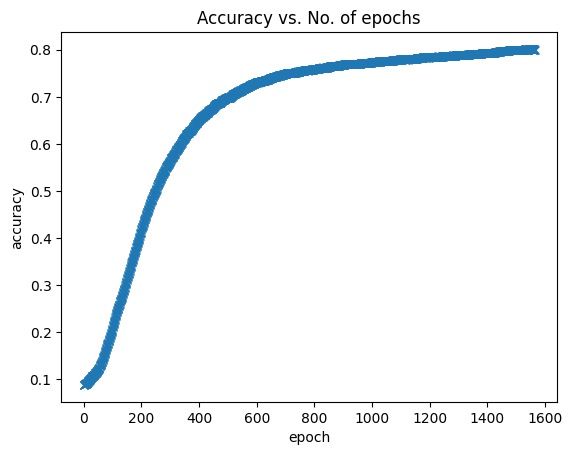

In [ ]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');